In [1]:
import glob
import pandas as pd
import numpy as np

import os
import re

In [2]:
attack = "crownibp"

In [3]:
results_folder = rf"results\{attack}"

In [4]:
algorithms = ["baseline","noise","fgsm","pgd","crownibp"]
exclude_datasets = ["Dialysis","divorce","Pbc3","vlbw"]

In [5]:
# CI , IBS , NegLL
metric = "CI"

In [6]:
ascending = False if metric=="CI" else True

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{metric}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

In [7]:
len(excels)/(len(algorithms)-1)

10.0

In [8]:
df = pd.DataFrame()
N_datasets = len(excels)
percentage_change = []
# print(excels)
for excel_i in excels:

    temp_df = pd.read_excel(excel_i)
    folder_name,dataset_name = excel_i.split("\\")[-3:-1]
    print(folder_name,dataset_name)
    
    temp_df.columns = ["eps"] + temp_df.columns[1:].to_list()
    col_name = (dataset_name,re.sub("results_","",folder_name))
    df[col_name] = temp_df[f"Robust {metric}"] #temp_df["Non Robust CI"].round(3).astype(str) + " / " + temp_df["Robust CI"].round(3).astype(str)

    col_name = (dataset_name,"baseline")
    df[col_name] = temp_df[f"Non Robust {metric}"]

df.index = temp_df.eps

results_crownibp Aids2
results_crownibp dataDIVAT1
results_crownibp flchain
results_crownibp Framingham
results_crownibp LeukSurv
results_crownibp prostate
results_crownibp retinopathy
results_crownibp stagec
results_crownibp TRACE
results_crownibp zinc
results_fgsm Aids2
results_fgsm dataDIVAT1
results_fgsm flchain
results_fgsm Framingham
results_fgsm LeukSurv
results_fgsm prostate
results_fgsm retinopathy
results_fgsm stagec
results_fgsm TRACE
results_fgsm zinc
results_noise Aids2
results_noise dataDIVAT1
results_noise flchain
results_noise Framingham
results_noise LeukSurv
results_noise prostate
results_noise retinopathy
results_noise stagec
results_noise TRACE
results_noise zinc
results_pgd Aids2
results_pgd dataDIVAT1
results_pgd flchain
results_pgd Framingham
results_pgd LeukSurv
results_pgd prostate
results_pgd retinopathy
results_pgd stagec
results_pgd TRACE
results_pgd zinc


In [9]:
micolumns = pd.MultiIndex.from_tuples(df.columns)
dfmi = (
    pd.DataFrame(
        df.values,
        index=df.index,
        columns=micolumns,
    )
    .sort_index()
    .sort_index(axis=1)
)

dfmi.sort_values(by="eps",ascending=False,inplace=True)
dfmi = dfmi.reindex(columns=algorithms, level=1)


In [10]:
dfmi[dfmi==''] = np.NaN
dfmi = dfmi.astype(float)
dfmi

Aids2                                         Framingham            \
      baseline     noise      fgsm       pgd  crownibp   baseline     noise   
eps                                                                           
1.00  0.521997  0.522309  0.511838  0.514027  0.577717   0.627954  0.633832   
0.90  0.521375  0.520394  0.516168  0.519045  0.578858   0.643216  0.646007   
0.80  0.520450  0.521158  0.517234  0.522016  0.578028   0.655609  0.658288   
0.70  0.522658  0.534420  0.519167  0.526336  0.576340   0.669190  0.670060   
0.60  0.539599  0.539882  0.522210  0.531411  0.575161   0.680861  0.680373   
0.50  0.542150  0.542382  0.526459  0.531175  0.574255   0.690405  0.689880   
0.40  0.547655  0.547225  0.531921  0.539231  0.573265   0.701742  0.701620   
0.30  0.560644  0.561455  0.547362  0.559097  0.572170   0.708294  0.709122   
0.20  0.574321  0.575387  0.568793  0.571086  0.569284   0.712533  0.713408   
0.10  0.571015  0.573425  0.567426  0.569548  0.567096   0.717148  0.717360   
0.05  0.570888  0.570954  0.563186  0.566336  0.566001   0.718416  0.718681   
0.00  0.568011  0.568859  0.564652  0.564002  0.565775   0.719371  0.719711   

                                    ...    stagec                      \
          fgsm       pgd  crownibp  ...  baseline     noise      fgsm   
eps                                 ...                                 
1.00  0.577125  0.527836  0.690310  ...  0.318627  0.313725  0.313725   
0.90  0.597439  0.550329  0.702129  ...  0.323529  0.343137  0.343137   
0.80  0.619296  0.573375  0.711021  ...  0.333333  0.352941  0.357843   
0.70  0.640479  0.598871  0.715233  ...  0.357843  0.392157  0.382353   
0.60  0.658617  0.624261  0.718215  ...  0.362745  0.416667  0.406863   
0.50  0.676347  0.650766  0.721090  ...  0.392157  0.455882  0.441176   
0.40  0.692082  0.677668  0.722809  ...  0.406863  0.485294  0.455882   
0.30  0.701981  0.699275  0.723334  ...  0.436275  0.529412  0.480392   
0.20  0.709546  0.717127  0.723573  ...  0.480392  0.549020  0.480392   
0.10  0.716745  0.722830  0.724188  ...  0.529412  0.563725  0.504902   
0.05  0.717652  0.723833  0.724193  ...  0.529412  0.563725  0.504902   
0.00  0.717981  0.723758  0.724146  ...  0.558824  0.573529  0.524510   

                              zinc                                          
           pgd  crownibp  baseline     noise      fgsm       pgd  crownibp  
eps                                                                         
1.00  0.352941  0.426471  0.263113  0.297800  0.305415  0.311337  0.706853  
0.90  0.367647  0.441176  0.270728  0.306261  0.330795  0.329949  0.758037  
0.80  0.397059  0.450980  0.288071  0.318951  0.359560  0.362521  0.785110  
0.70  0.421569  0.465686  0.295262  0.331641  0.408629  0.411168  0.788494  
0.60  0.450980  0.460784  0.316413  0.366328  0.487733  0.491963  0.779188  
0.50  0.446078  0.446078  0.369712  0.439086  0.585448  0.611675  0.774958  
0.40  0.455882  0.455882  0.461083  0.565567  0.684433  0.697124  0.772843  
0.30  0.475490  0.465686  0.600677  0.690778  0.739425  0.747039  0.770728  
0.20  0.485294  0.470588  0.741963  0.745347  0.769882  0.770728  0.768613  
0.10  0.490196  0.475490  0.761421  0.769036  0.781303  0.780034  0.765651  
0.05  0.500000  0.495098  0.754230  0.763959  0.782149  0.775804  0.766497  
0.00  0.500000  0.504902  0.748308  0.766920  0.780457  0.782995  0.763536  

[12 rows x 50 columns]

In [11]:
# dfmi.T.groupby(axis=0,level=0).rank(axis=0,na_option='bottom',method="average",ascending=ascending)

In [12]:
# for i,sub_df in dfmi.groupby(level=0,axis=1):
#     print(sub_df,sub_df.columns)
#     print(sub_df.rank(axis=1,ascending=ascending))



In [13]:
dfmi.applymap(np.isnan).sum().sum()

C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\3478686788.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfmi.applymap(np.isnan).sum().sum()


0

In [14]:
best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=1,na_option='bottom',method="average",ascending=ascending)
best_per_dataset_rank

C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\1243889888.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=1,na_option='bottom',method="average",ascending=ascending)
C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\1243889888.py:1: FutureWarning: DataFrameGroupBy.rank with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=1,na_option='bottom',method="average",ascending=ascending)


Aids2                          Framingham                           \
     baseline noise fgsm  pgd crownibp   baseline noise fgsm  pgd crownibp   
eps                                                                          
1.00      3.0   2.0  5.0  4.0      1.0        3.0   2.0  4.0  5.0      1.0   
0.90      2.0   3.0  5.0  4.0      1.0        3.0   2.0  4.0  5.0      1.0   
0.80      4.0   3.0  5.0  2.0      1.0        3.0   2.0  4.0  5.0      1.0   
0.70      4.0   2.0  5.0  3.0      1.0        3.0   2.0  4.0  5.0      1.0   
0.60      3.0   2.0  5.0  4.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.50      3.0   2.0  5.0  4.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.40      2.0   3.0  5.0  4.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.30      3.0   2.0  5.0  4.0      1.0        3.0   2.0  4.0  5.0      1.0   
0.20      2.0   1.0  5.0  3.0      4.0        4.0   3.0  5.0  2.0      1.0   
0.10      2.0   1.0  4.0  3.0      5.0        4.0   3.0  5.0  2.0      1.0   
0.05      2.0   1.0  5.0  3.0      4.0        4.0   3.0  5.0  2.0      1.0   
0.00      2.0   1.0  4.0  5.0      3.0        4.0   3.0  5.0  2.0      1.0   

      ...   stagec                              zinc                           
      ... baseline noise fgsm  pgd crownibp baseline noise fgsm  pgd crownibp  
eps   ...                                                                      
1.00  ...      3.0   4.5  4.5  2.0      1.0      5.0   4.0  3.0  2.0      1.0  
0.90  ...      5.0   3.5  3.5  2.0      1.0      5.0   4.0  2.0  3.0      1.0  
0.80  ...      5.0   4.0  3.0  2.0      1.0      5.0   4.0  3.0  2.0      1.0  
0.70  ...      5.0   3.0  4.0  2.0      1.0      5.0   4.0  3.0  2.0      1.0  
0.60  ...      5.0   3.0  4.0  2.0      1.0      5.0   4.0  3.0  2.0      1.0  
0.50  ...      5.0   1.0  4.0  2.5      2.5      5.0   4.0  3.0  2.0      1.0  
0.40  ...      5.0   1.0  3.0  3.0      3.0      5.0   4.0  3.0  2.0      1.0  
0.30  ...      5.0   1.0  2.0  3.0      4.0      5.0   4.0  3.0  2.0      1.0  
0.20  ...      3.5   1.0  3.5  2.0      5.0      5.0   4.0  2.0  1.0      3.0  
0.10  ...      2.0   1.0  3.0  4.0      5.0      5.0   3.0  1.0  2.0      4.0  
0.05  ...      2.0   1.0  3.0  4.0      5.0      5.0   4.0  1.0  2.0      3.0  
0.00  ...      2.0   1.0  3.0  5.0      4.0      5.0   3.0  2.0  1.0      4.0  

[12 rows x 50 columns]

In [15]:
# best_per_dataset_rank.stack(1)

In [16]:
best_per_dataset_avg_rank = best_per_dataset_rank.stack(level=1).mean(1).unstack(1).sort_values(by="eps",ascending=False)
best_per_dataset_avg_rank

baseline  noise  fgsm   pgd  crownibp
eps                                        
1.00      3.30   3.25  3.65  3.40      1.40
0.90      3.50   3.35  3.45  3.30      1.40
0.80      3.60   3.70  3.50  2.80      1.40
0.70      3.60   3.30  3.55  3.15      1.40
0.60      3.50   3.20  3.60  3.30      1.40
0.50      3.50   3.10  3.70  3.35      1.35
0.40      3.40   3.30  3.60  3.40      1.30
0.30      3.90   3.00  3.40  3.30      1.40
0.20      3.85   3.00  3.45  2.50      2.20
0.10      3.90   2.70  3.15  2.85      2.40
0.05      3.70   3.00  3.35  2.75      2.20
0.00      3.70   2.90  3.30  3.00      2.10

In [17]:
if not ascending:
    best_per_dataset = dfmi.groupby(level=0,axis=1).idxmax(1)
else:
    best_per_dataset = dfmi.groupby(level=0,axis=1).idxmin(1)
best_per_dataset.applymap(lambda x: x[1])

C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\1722459016.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  best_per_dataset = dfmi.groupby(level=0,axis=1).idxmax(1)
C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\1722459016.py:2: FutureWarning: DataFrameGroupBy.idxmax with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  best_per_dataset = dfmi.groupby(level=0,axis=1).idxmax(1)
C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\1722459016.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  best_per_dataset.applymap(lambda x: x[1])


Aids2 Framingham  LeukSurv     TRACE dataDIVAT1   flchain  prostate  \
eps                                                                            
1.00  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.90  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.80  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.70  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.60  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.50  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.40  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.30  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.20     noise   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.10     noise   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.05     noise   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.00     noise   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   

     retinopathy    stagec      zinc  
eps                                   
1.00    crownibp  crownibp  crownibp  
0.90    crownibp  crownibp  crownibp  
0.80    crownibp  crownibp  crownibp  
0.70    crownibp  crownibp  crownibp  
0.60    crownibp  crownibp  crownibp  
0.50       noise     noise  crownibp  
0.40       noise     noise  crownibp  
0.30       noise     noise  crownibp  
0.20       noise     noise       pgd  
0.10       noise     noise      fgsm  
0.05       noise     noise      fgsm  
0.00       noise     noise       pgd

In [18]:
if metric != "NegLL":
     # aggregate all the CI files
    os.listdir(results_folder)
    excels = []
    for folder in os.listdir(results_folder):
        glob_search = os.path.join(results_folder,folder,f"{metric}_all.xlsx")
        excels.extend(glob.glob(glob_search))
        
    df = pd.DataFrame()
    N_datasets = len(excels)
    percentage_change = []
    for excel_i in excels:
    
        temp_df = pd.read_excel(excel_i)
        folder_name = excel_i.split("\\")[-2]
        temp_df.columns = ["eps"] + temp_df.columns[1:].to_list()
        col_name = re.sub("results_","",folder_name)
        df[col_name] = temp_df["%"] #temp_df["Non Robust CI"].round(3).astype(str) + " / " + temp_df["Robust CI"].round(3).astype(str)
    
    df.index = temp_df.eps
    df = df.reindex(columns=algorithms[1:], level=1)

In [19]:
df

noise       fgsm        pgd    crownibp
eps                                              
1.00   2.186689  -0.059982   1.582788  107.587157
0.90   2.727537   1.370696   6.448337  106.679759
0.80   1.993677   2.732339  26.131319  102.895774
0.70   2.879120   9.807000  57.992143   97.462230
0.60   4.025581  34.057752  68.223676   89.361570
0.50   6.028001  58.073280  62.907155   76.790839
0.40  13.849939  47.604872  47.286218   56.320144
0.30   9.876208  12.349270  11.852893   16.165436
0.20   2.282640   1.315127   1.200457    3.219390
0.10   1.171577   0.181076  -0.004908    1.304488
0.05   0.546318  -0.350965  -0.318670    1.561015
0.00   0.009752  -0.748298  -0.885914    1.267909

In [20]:
excel_name = os.path.join(results_folder,f"{metric}_all.xlsx")
with pd.ExcelWriter(excel_name) as writer:  
    dfmi.applymap(lambda x: np.round(x,3)).to_excel(writer,sheet_name=metric)
    best_per_dataset_rank.to_excel(writer,sheet_name="rank")
    best_per_dataset_avg_rank.to_excel(writer,sheet_name="average_rank")
    best_per_dataset.applymap(lambda x: x[1]).to_excel(writer,sheet_name="best")
    df.to_excel(writer,sheet_name="%")

C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\229516633.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfmi.applymap(lambda x: np.round(x,3)).to_excel(writer,sheet_name=metric)
C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\229516633.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  best_per_dataset.applymap(lambda x: x[1]).to_excel(writer,sheet_name="best")


In [21]:
best_per_dataset_avg_rank.index = ["{:.2f}".format(float(x)) for x in np.round(best_per_dataset_avg_rank.index.tolist(),2)]
best_per_dataset_avg_rank.index.name = r"$\epsilon$"
print(best_per_dataset_avg_rank.applymap(lambda x: str(np.round(x,2))).to_latex(index=True))

C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\3581541270.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(best_per_dataset_avg_rank.applymap(lambda x: str(np.round(x,2))).to_latex(index=True))


\begin{tabular}{llllll}
\toprule
 & baseline & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  &  \\
\midrule
1.00 & 3.3 & 3.25 & 3.65 & 3.4 & 1.4 \\
0.90 & 3.5 & 3.35 & 3.45 & 3.3 & 1.4 \\
0.80 & 3.6 & 3.7 & 3.5 & 2.8 & 1.4 \\
0.70 & 3.6 & 3.3 & 3.55 & 3.15 & 1.4 \\
0.60 & 3.5 & 3.2 & 3.6 & 3.3 & 1.4 \\
0.50 & 3.5 & 3.1 & 3.7 & 3.35 & 1.35 \\
0.40 & 3.4 & 3.3 & 3.6 & 3.4 & 1.3 \\
0.30 & 3.9 & 3.0 & 3.4 & 3.3 & 1.4 \\
0.20 & 3.85 & 3.0 & 3.45 & 2.5 & 2.2 \\
0.10 & 3.9 & 2.7 & 3.15 & 2.85 & 2.4 \\
0.05 & 3.7 & 3.0 & 3.35 & 2.75 & 2.2 \\
0.00 & 3.7 & 2.9 & 3.3 & 3.0 & 2.1 \\
\bottomrule
\end{tabular}



In [22]:
if metric == "NegLL":
    dfmi.index = ["{:.2f}".format(float(x)) for x in np.round(dfmi.index.tolist(),2)]
    dfmi.index.name = r"$\epsilon$"
    print(dfmi.applymap(lambda x: np.round(x,3)).applymap(lambda x: "{:.2e}".format(x)).to_latex(index=True,multicolumn_format="c"))
else:
    dfmi.index = ["{:.2f}".format(float(x)) for x in np.round(dfmi.index.tolist(),2)]
    dfmi.index.name = r"$\epsilon$"
    print(dfmi.applymap(lambda x: np.round(x,3)).applymap(str).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllllllllllllllllllllllllllllllllllllllllllllllllll}
\toprule
 & \multicolumn{5}{c}{Aids2} & \multicolumn{5}{c}{Framingham} & \multicolumn{5}{c}{LeukSurv} & \multicolumn{5}{c}{TRACE} & \multicolumn{5}{c}{dataDIVAT1} & \multicolumn{5}{c}{flchain} & \multicolumn{5}{c}{prostate} & \multicolumn{5}{c}{retinopathy} & \multicolumn{5}{c}{stagec} & \multicolumn{5}{c}{zinc} \\
 & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
1.00 & 

C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\718377934.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.applymap(lambda x: np.round(x,3)).applymap(str).to_latex(index=True,multicolumn_format="c"))


In [23]:
dataset_names = np.array(list(map(np.array,dfmi.columns)))[:,0]

In [24]:
dataset_names

array(['Aids2', 'Aids2', 'Aids2', 'Aids2', 'Aids2', 'Framingham',
       'Framingham', 'Framingham', 'Framingham', 'Framingham', 'LeukSurv',
       'LeukSurv', 'LeukSurv', 'LeukSurv', 'LeukSurv', 'TRACE', 'TRACE',
       'TRACE', 'TRACE', 'TRACE', 'dataDIVAT1', 'dataDIVAT1',
       'dataDIVAT1', 'dataDIVAT1', 'dataDIVAT1', 'flchain', 'flchain',
       'flchain', 'flchain', 'flchain', 'prostate', 'prostate',
       'prostate', 'prostate', 'prostate', 'retinopathy', 'retinopathy',
       'retinopathy', 'retinopathy', 'retinopathy', 'stagec', 'stagec',
       'stagec', 'stagec', 'stagec', 'zinc', 'zinc', 'zinc', 'zinc',
       'zinc'], dtype='<U11')

## LONG TABLE

In [25]:
dfmi.T

$\epsilon$                1.00      0.90      0.80      0.70      0.60  \
Aids2       baseline  0.521997  0.521375  0.520450  0.522658  0.539599   
            noise     0.522309  0.520394  0.521158  0.534420  0.539882   
            fgsm      0.511838  0.516168  0.517234  0.519167  0.522210   
            pgd       0.514027  0.519045  0.522016  0.526336  0.531411   
            crownibp  0.577717  0.578858  0.578028  0.576340  0.575161   
Framingham  baseline  0.627954  0.643216  0.655609  0.669190  0.680861   
            noise     0.633832  0.646007  0.658288  0.670060  0.680373   
            fgsm      0.577125  0.597439  0.619296  0.640479  0.658617   
            pgd       0.527836  0.550329  0.573375  0.598871  0.624261   
            crownibp  0.690310  0.702129  0.711021  0.715233  0.718215   
LeukSurv    baseline  0.553511  0.558804  0.564388  0.569826  0.576430   
            noise     0.537487  0.542877  0.541517  0.545547  0.555939   
            fgsm      0.538264  0.545596  0.549092  0.554579  0.559920   
            pgd       0.533019  0.539332  0.541566  0.544576  0.555793   
            crownibp  0.485238  0.502865  0.523696  0.539186  0.553122   
TRACE       baseline  0.639371  0.661335  0.683242  0.702776  0.714428   
            noise     0.592228  0.610710  0.628523  0.650181  0.671896   
            fgsm      0.599269  0.615857  0.634148  0.650640  0.669332   
            pgd       0.608912  0.627050  0.643121  0.658848  0.675417   
            crownibp  0.698950  0.713414  0.728050  0.734498  0.736813   
dataDIVAT1  baseline  0.558246  0.575398  0.594431  0.611460  0.628192   
            noise     0.534636  0.548090  0.560849  0.574170  0.590391   
            fgsm      0.573367  0.583114  0.593199  0.604613  0.617106   
            pgd       0.575254  0.585947  0.598093  0.609824  0.621821   
            crownibp  0.634298  0.640348  0.646448  0.652769  0.656645   
flchain     baseline  0.107036  0.109223  0.112472  0.118060  0.125750   
            noise     0.100357  0.103713  0.108160  0.115188  0.127990   
            fgsm      0.084170  0.088607  0.103218  0.175448  0.465422   
            pgd       0.098539  0.148184  0.364528  0.746875  0.893521   
            crownibp  0.916742  0.918954  0.921478  0.924964  0.926844   
prostate    baseline  0.347562  0.359447  0.370119  0.376667  0.388795   
            noise     0.433422  0.441911  0.449430  0.457919  0.467621   
            fgsm      0.410381  0.416202  0.430754  0.445307  0.461315   
            pgd       0.401407  0.401649  0.409411  0.409896  0.426146   
            crownibp  0.581373  0.595925  0.610235  0.623575  0.635460   
retinopathy baseline  0.606899  0.625143  0.647377  0.658210  0.661060   
            noise     0.638826  0.657640  0.666192  0.679304  0.681585   
            fgsm      0.634265  0.653649  0.668472  0.672463  0.680445   
            pgd       0.619441  0.645667  0.667902  0.672463  0.675314   
            crownibp  0.718643  0.712372  0.707811  0.693558  0.688426   
stagec      baseline  0.318627  0.323529  0.333333  0.357843  0.362745   
            noise     0.313725  0.343137  0.352941  0.392157  0.416667   
            fgsm      0.313725  0.343137  0.357843  0.382353  0.406863   
            pgd       0.352941  0.367647  0.397059  0.421569  0.450980   
            crownibp  0.426471  0.441176  0.450980  0.465686  0.460784   
zinc        baseline  0.263113  0.270728  0.288071  0.295262  0.316413   
            noise     0.297800  0.306261  0.318951  0.331641  0.366328   
            fgsm      0.305415  0.330795  0.359560  0.408629  0.487733   
            pgd       0.311337  0.329949  0.362521  0.411168  0.491963   
            crownibp  0.706853  0.758037  0.785110  0.788494  0.779188   

$\epsilon$                0.50      0.40      0.30      0.20      0.10  \
Aids2       baseline  0.542150  0.547655  0.560644  0.574321  0.571015   
            noise     0.542382  0.547225  0.561455  0.575387  0.573425   
   

In [26]:
if metric == "NegLL":
    print(dfmi.T.applymap(lambda x: str(np.round(x,3))).applymap(lambda x: "{:.2e}".format(float(x))).to_latex(index=True,multicolumn_format="c"))
else:
    print(dfmi.T.applymap(lambda x: str(np.round(x,3))).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{llllllllllllll}
\toprule
 & $\epsilon$ & 1.00 & 0.90 & 0.80 & 0.70 & 0.60 & 0.50 & 0.40 & 0.30 & 0.20 & 0.10 & 0.05 & 0.00 \\
\midrule
\multirow[t]{5}{*}{Aids2} & baseline & 0.522 & 0.521 & 0.52 & 0.523 & 0.54 & 0.542 & 0.548 & 0.561 & 0.574 & 0.571 & 0.571 & 0.568 \\
 & noise & 0.522 & 0.52 & 0.521 & 0.534 & 0.54 & 0.542 & 0.547 & 0.561 & 0.575 & 0.573 & 0.571 & 0.569 \\
 & fgsm & 0.512 & 0.516 & 0.517 & 0.519 & 0.522 & 0.526 & 0.532 & 0.547 & 0.569 & 0.567 & 0.563 & 0.565 \\
 & pgd & 0.514 & 0.519 & 0.522 & 0.526 & 0.531 & 0.531 & 0.539 & 0.559 & 0.571 & 0.57 & 0.566 & 0.564 \\
 & crownibp & 0.578 & 0.579 & 0.578 & 0.576 & 0.575 & 0.574 & 0.573 & 0.572 & 0.569 & 0.567 & 0.566 & 0.566 \\
\cline{1-14}
\multirow[t]{5}{*}{Framingham} & baseline & 0.628 & 0.643 & 0.656 & 0.669 & 0.681 & 0.69 & 0.702 & 0.708 & 0.713 & 0.717 & 0.718 & 0.719 \\
 & noise & 0.634 & 0.646 & 0.658 & 0.67 & 0.68 & 0.69 & 0.702 & 0.709 & 0.713 & 0.717 & 0.719 & 0.72 \\
 & fgsm & 0.577 & 0.597 & 0.6

C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\2645064119.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.T.applymap(lambda x: str(np.round(x,3))).to_latex(index=True,multicolumn_format="c"))


In [27]:
# print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: str(np.round(x,3))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))

if metric == "NegLL":
    print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: "{:.2e}".format(float(x))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))
else:
    print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: str(np.round(x,3))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllllllllllll}
\toprule
$\epsilon$ & 1.00 & 0.90 & 0.80 & 0.70 & 0.60 & 0.50 & 0.40 & 0.30 & 0.20 & 0.10 & 0.05 & 0.00 \\
\midrule
baseline & 0.454 & 0.465 & 0.477 & 0.488 & 0.499 & 0.515 & 0.536 & 0.593 & 0.659 & 0.671 & 0.673 & 0.676 \\
noise & 0.46 & 0.472 & 0.481 & 0.495 & 0.51 & 0.532 & 0.572 & 0.642 & 0.671 & 0.678 & 0.676 & 0.677 \\
fgsm & 0.455 & 0.469 & 0.483 & 0.505 & 0.553 & 0.61 & 0.636 & 0.656 & 0.667 & 0.673 & 0.672 & 0.673 \\
pgd & 0.454 & 0.471 & 0.508 & 0.56 & 0.595 & 0.615 & 0.634 & 0.654 & 0.667 & 0.673 & 0.672 & 0.672 \\
crownibp & 0.644 & 0.656 & 0.666 & 0.671 & 0.673 & 0.673 & 0.676 & 0.677 & 0.679 & 0.68 & 0.684 & 0.685 \\
\bottomrule
\end{tabular}



C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\3680683538.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: str(np.round(x,3))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))


In [28]:
dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().reindex(algorithms)

$\epsilon$      1.00      0.90      0.80      0.70      0.60      0.50  \
baseline    0.454432  0.464820  0.476949  0.488195  0.499427  0.515192   
noise       0.460462  0.472074  0.480601  0.495059  0.509867  0.531621   
fgsm        0.454782  0.469056  0.483282  0.505368  0.552896  0.610426   
pgd         0.454271  0.471480  0.507959  0.560042  0.594663  0.614786   
crownibp    0.643659  0.656408  0.666286  0.671430  0.673066  0.673073   

$\epsilon$      0.40      0.30      0.20      0.10      0.05      0.00  
baseline    0.536393  0.593137  0.658842  0.671318  0.673253  0.676237  
noise       0.572060  0.642164  0.670752  0.678038  0.676349  0.676662  
fgsm        0.636419  0.655712  0.667331  0.673358  0.672230  0.672758  
pgd         0.633865  0.653712  0.667158  0.672665  0.672477  0.672245  
crownibp    0.676064  0.677356  0.678841  0.680361  0.683945  0.685234

In [29]:
dfmi.T.groupby(level=0).mean()

$\epsilon$       1.00      0.90      0.80      0.70      0.60      0.50  \
Aids2        0.529578  0.531168  0.531777  0.535784  0.541652  0.543284   
Framingham   0.611411  0.627824  0.643518  0.658767  0.672465  0.685697   
LeukSurv     0.529504  0.537895  0.544052  0.550743  0.560241  0.571798   
TRACE        0.627746  0.645673  0.663417  0.679389  0.693577  0.705615   
dataDIVAT1   0.575160  0.586579  0.598604  0.610567  0.622831  0.635508   
flchain      0.261369  0.273736  0.321971  0.416107  0.507905  0.593917   
prostate     0.434829  0.443027  0.453990  0.462673  0.475867  0.487752   
retinopathy  0.643615  0.658894  0.671551  0.675200  0.677366  0.674173   
stagec       0.345098  0.363725  0.378431  0.403922  0.419608  0.436275   
zinc         0.376904  0.399154  0.422843  0.447039  0.488325  0.556176   

$\epsilon$       0.40      0.30      0.20      0.10      0.05      0.00  
Aids2        0.547859  0.560145  0.571774  0.569702  0.567473  0.566260  
Framingham   0.699184  0.708401  0.715237  0.719654  0.720555  0.720993  
LeukSurv     0.584753  0.601127  0.623162  0.638943  0.640847  0.639643  
TRACE        0.718243  0.729489  0.736767  0.741952  0.743012  0.744294  
dataDIVAT1   0.646928  0.654163  0.655391  0.648995  0.646814  0.646020  
flchain      0.650766  0.806830  0.915221  0.920569  0.922255  0.922570  
prostate     0.505797  0.534514  0.561290  0.577201  0.578511  0.576037  
retinopathy  0.667902  0.662315  0.654561  0.650228  0.649886  0.649658  
stagec       0.451961  0.477451  0.493137  0.512745  0.518627  0.532353  
zinc         0.636210  0.709729  0.759306  0.771489  0.768528  0.768443

In [30]:
# pd.set_option('display.max_columns', None)
# print(dfmi)

In [31]:
print(best_per_dataset.applymap(lambda x: x[1]).to_latex(index=False))

\begin{tabular}{llllllllll}
\toprule
Aids2 & Framingham & LeukSurv & TRACE & dataDIVAT1 & flchain & prostate & retinopathy & stagec & zinc \\
\midrule
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & noise & noise & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & noise & noise & crownibp \\
crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & noise &

C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\3574660769.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(best_per_dataset.applymap(lambda x: x[1]).to_latex(index=False))


In [32]:
df.index = ["{:.2f}".format(float(x)) for x in np.round(df.index.tolist(),2)]
df.index.name = r"$\epsilon$"
print(df.applymap(lambda x: str(np.round(x,3))).to_latex(index=True))

\begin{tabular}{lllll}
\toprule
 & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  \\
\midrule
1.00 & 2.187 & -0.06 & 1.583 & 107.587 \\
0.90 & 2.728 & 1.371 & 6.448 & 106.68 \\
0.80 & 1.994 & 2.732 & 26.131 & 102.896 \\
0.70 & 2.879 & 9.807 & 57.992 & 97.462 \\
0.60 & 4.026 & 34.058 & 68.224 & 89.362 \\
0.50 & 6.028 & 58.073 & 62.907 & 76.791 \\
0.40 & 13.85 & 47.605 & 47.286 & 56.32 \\
0.30 & 9.876 & 12.349 & 11.853 & 16.165 \\
0.20 & 2.283 & 1.315 & 1.2 & 3.219 \\
0.10 & 1.172 & 0.181 & -0.005 & 1.304 \\
0.05 & 0.546 & -0.351 & -0.319 & 1.561 \\
0.00 & 0.01 & -0.748 & -0.886 & 1.268 \\
\bottomrule
\end{tabular}



C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\3740848601.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: str(np.round(x,3))).to_latex(index=True))


## PDF PICTURES

In [33]:
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import pandas as pd
import re

In [34]:
attack = "crownibp"

In [35]:
results_folder = rf"results\{attack}"

In [36]:
algorithms = ["baseline","noise","fgsm","pgd","crownibp"]

In [37]:
# CI , IBS , NegLL
img_name = "population_curves_attacked_test"

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{img_name}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

In [38]:
metadata = 'eps'

In [39]:
n_rows = int(len(excels) / (len(algorithms)-1))
n_cols = int(len(algorithms) - 1)

In [40]:
excels

['results\\crownibp\\results_crownibp\\Aids2\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\dataDIVAT1\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\flchain\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\Framingham\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\LeukSurv\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\prostate\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\retinopathy\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\stagec\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\TRACE\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_crownibp\\zinc\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_fgsm\\Aids2\\population_curves_attacked_test.xlsx',
 'results\\crownibp\\results_fgsm\\dataDIVAT1

In [41]:
len(excels)/(len(algorithms)-1)

10.0

In [42]:
excels = np.sort(excels)
files = pd.DataFrame(excels.reshape(-1,len(algorithms)-1,order="F"),columns=["crownibp","fgsm","noise","pgd"]).reindex(["noise","fgsm","pgd","crownibp"],axis=1).values

In [43]:
df_population = pd.read_excel(excels[0])

In [44]:
df_population

t    kmf_St  baseline_St  robust_St  robust_eps=1.00  \
0     0.000000  1.000000     1.000000   1.000000         1.000000   
1     0.000629  0.989437     0.999618   0.999637         0.999485   
2     0.001258  0.989437     0.999237   0.999274         0.998970   
3     0.001886  0.989437     0.998855   0.998912         0.998456   
4     0.002515  0.989437     0.998474   0.998549         0.997941   
...        ...       ...          ...        ...              ...   
9995  6.285156  0.095710     0.036797   0.028003         0.006741   
9996  6.285785  0.095710     0.036786   0.027993         0.006738   
9997  6.286414  0.095710     0.036775   0.027983         0.006734   
9998  6.287043  0.095710     0.036764   0.027973         0.006731   
9999  6.287671  0.095710     0.036753   0.027964         0.006728   

      robust_eps=0.90  robust_eps=0.80  robust_eps=0.70  robust_eps=0.60  \
0            1.000000         1.000000         1.000000         1.000000   
1            0.999522         0.999550         0.999570         0.999585   
2            0.999044         0.999100         0.999141         0.999171   
3            0.998566         0.998650         0.998712         0.998756   
4            0.998089         0.998201         0.998283         0.998342   
...               ...              ...              ...              ...   
9995         0.009405         0.012168         0.014742         0.016961   
9996         0.009400         0.012163         0.014736         0.016955   
9997         0.009396         0.012158         0.014730         0.016948   
9998         0.009392         0.012153         0.014724         0.016941   
9999         0.009388         0.012147         0.014718         0.016934   

      robust_eps=0.50  ...  baseline_eps=0.80  baseline_eps=0.70  \
0            1.000000  ...       1.000000e+00           1.000000   
1            0.999598  ...       9.466739e-01           0.975987   
2            0.999196  ...       8.969685e-01           0.952691   
3            0.998794  ...       8.506123e-01           0.930087   
4            0.998392  ...       8.073549e-01           0.908155   
...               ...  ...                ...                ...   
9995         0.019120  ...       2.479331e-07           0.000008   
9996         0.019112  ...       2.476949e-07           0.000008   
9997         0.019105  ...       2.474573e-07           0.000008   
9998         0.019097  ...       2.472196e-07           0.000008   
9999         0.019090  ...       2.469824e-07           0.000008   

      baseline_eps=0.60  baseline_eps=0.50  baseline_eps=0.40  \
0              1.000000           1.000000           1.000000   
1              0.989290           0.995023           0.997640   
2              0.978718           0.990076           0.995286   
3              0.968282           0.985157           0.992938   
4              0.957979           0.980267           0.990597   
...                 ...                ...                ...   
9995           0.000084           0.000371           0.000994   
9996           0.000084           0.000371           0.000994   
9997           0.000084           0.000371           0.000994   
9998           0.000084           0.000370           0.000994   
9999           0.000084           0.000370           0.000993   

      baseline_eps=0.30  baseline_eps=0.20  baseline_eps=0.10  \
0              1.000000           1.000000           1.000000   
1              0.998818           0.999332           0.999543   
2              0.997637           0.998665           0.999087   
3              0.996457           0.997998           0.998630   
4              0.995279           0.997331           0.998174   
...                 ...                ...                ...   
9995           0.002139           0.005861           0.020496   
9996           0.002139           0.005859           0.020489   
9997           0.002138           0.005857           0.020482   
9998           0.002138

In [45]:
save_folder = results_folder = os.path.join(fr"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\{attack}","perturb_curves.pdf")

In [46]:
print(save_folder)

C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\crownibp\perturb_curves.pdf


In [47]:
save_folder

'C:\\Users\\lpott\\OneDrive\\Documents\\Northeastern University\\Classes\\EECE 7398 Verifiable Machine Learning\\EECE7398_Final_Project\\results\\crownibp\\perturb_curves.pdf'

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3
7 0
7 1
7 2
7 3
8 0
8 1
8 2
8 3
9 0
9 1
9 2
9 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\2738624271.py:69: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([base1, base2,base3,robust1], labels=labels,


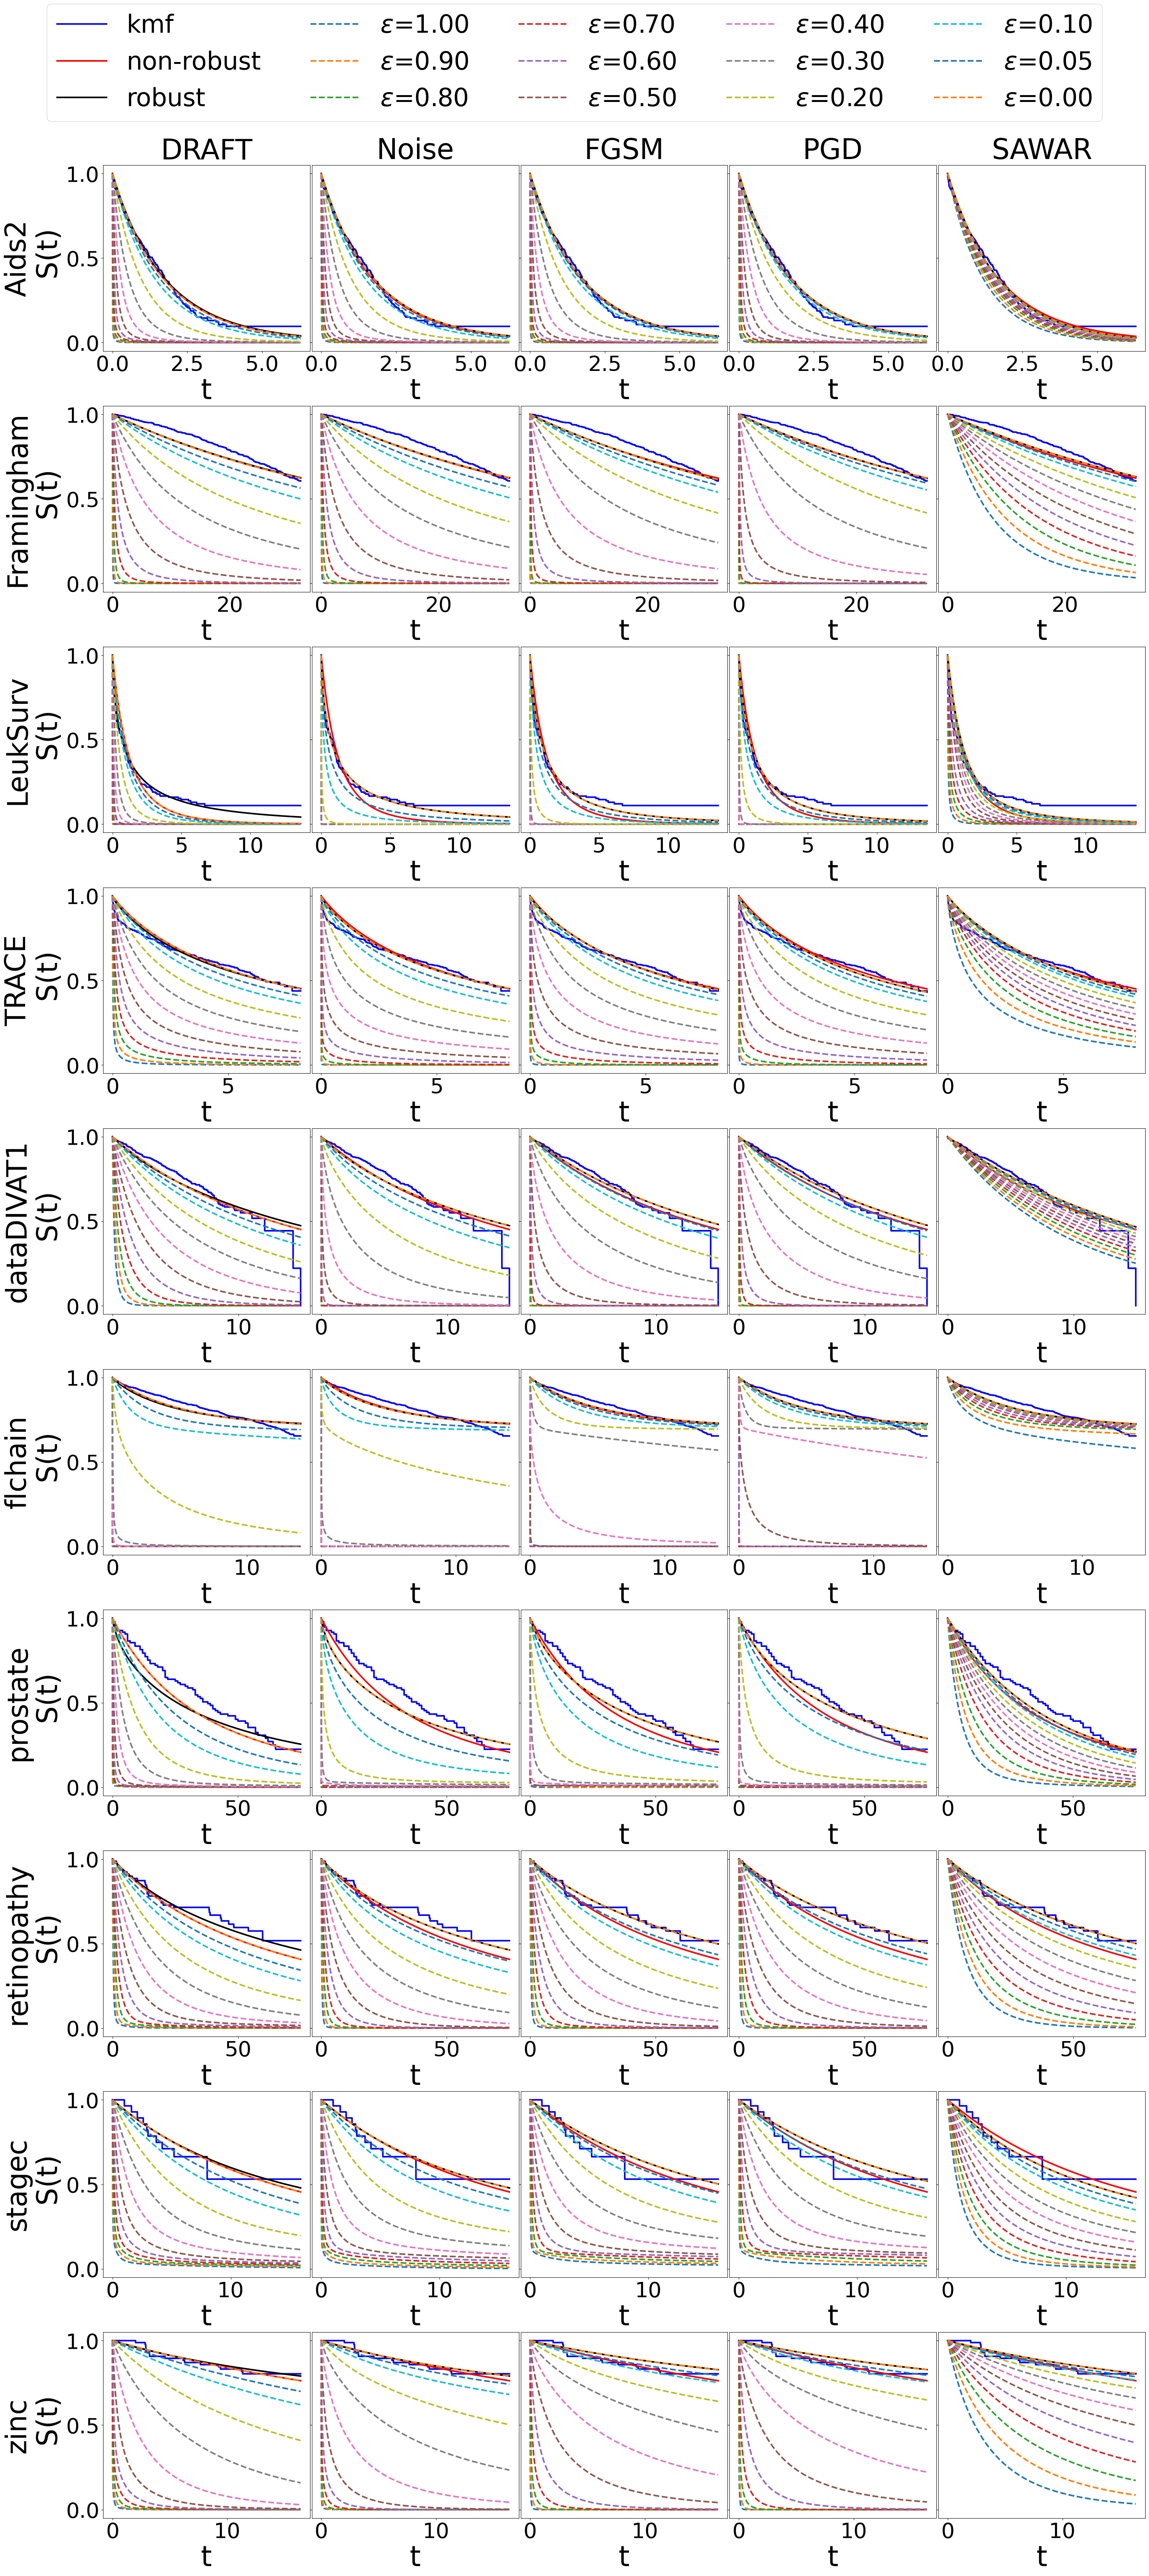

In [50]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"perturb_curves.pdf")

fig,axes = plt.subplots(n_rows,n_cols+1,figsize=(30,64),sharey=True)

SMALL_SIZE = 80
plt.rc('xtick', labelsize=SMALL_SIZE//2)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE//2)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)   # fontsize of the figure title


for i in range(n_rows):
    for j in range(n_cols):
        print(i,j)
        fileij = files[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        df_population= df_population.iloc[:,3:]

        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in robust_df.columns]
        baseline_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in baseline_df.columns]

        # print(base_models)
        base1 = axes[i][j+1].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
        base2 = axes[i][j+1].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
        base3 = axes[i][j+1].plot(t,base_models.iloc[:,2],linewidth=3,c="k")

  
        robust1 = axes[i][j+1].plot(t,robust_df,'--',linewidth=3)
  
        if j == 0:
            base1 = axes[i][j].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
            base2 = axes[i][j].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
            base3 = axes[i][j].plot(t,base_models.iloc[:,2],linewidth=3,c="k")
            baseline1 = axes[i][j].plot(t,baseline_df,'--',linewidth=3)

            axes[i][j].set_ylabel(f"{dataset}\n S(t)" ,fontsize=SMALL_SIZE//1.5)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

        axes[i][j+1].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

for ax, col in zip(axes[0], algorithms):
    col = "SAWAR" if col == "crownibp" else col
    col = "DRAFT" if col == "baseline" else col
    col = "PGD" if col == "pgd" else col
    col = "FGSM" if col == "fgsm" else col
    col = "Noise" if col == "noise" else col

    ax.set_title(col,fontsize=SMALL_SIZE//1.5)

labels = base_models.columns.tolist() + robust_df.columns.tolist()
labels[labels.index("baseline")] = "non-robust"

fig.legend([base1, base2,base3,robust1], labels=labels, 
           loc="upper center",ncols=5,fontsize=30,bbox_to_anchor=(.5,1.06),prop={'size':SMALL_SIZE//1.7}) 

# axes[0][3].legend(base_models.columns.tolist() + robust_df.columns.tolist(),fontsize=20,ncol=2,loc=1)

# plt.legend(base_models.columns.tolist() + robust_df.columns.tolist(),loc='upper center',ncol=5)
plt.tight_layout(pad=0)
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

In [ ]:
files[[-7,-2,-1],:]

0 0
0 1



KeyboardInterrupt



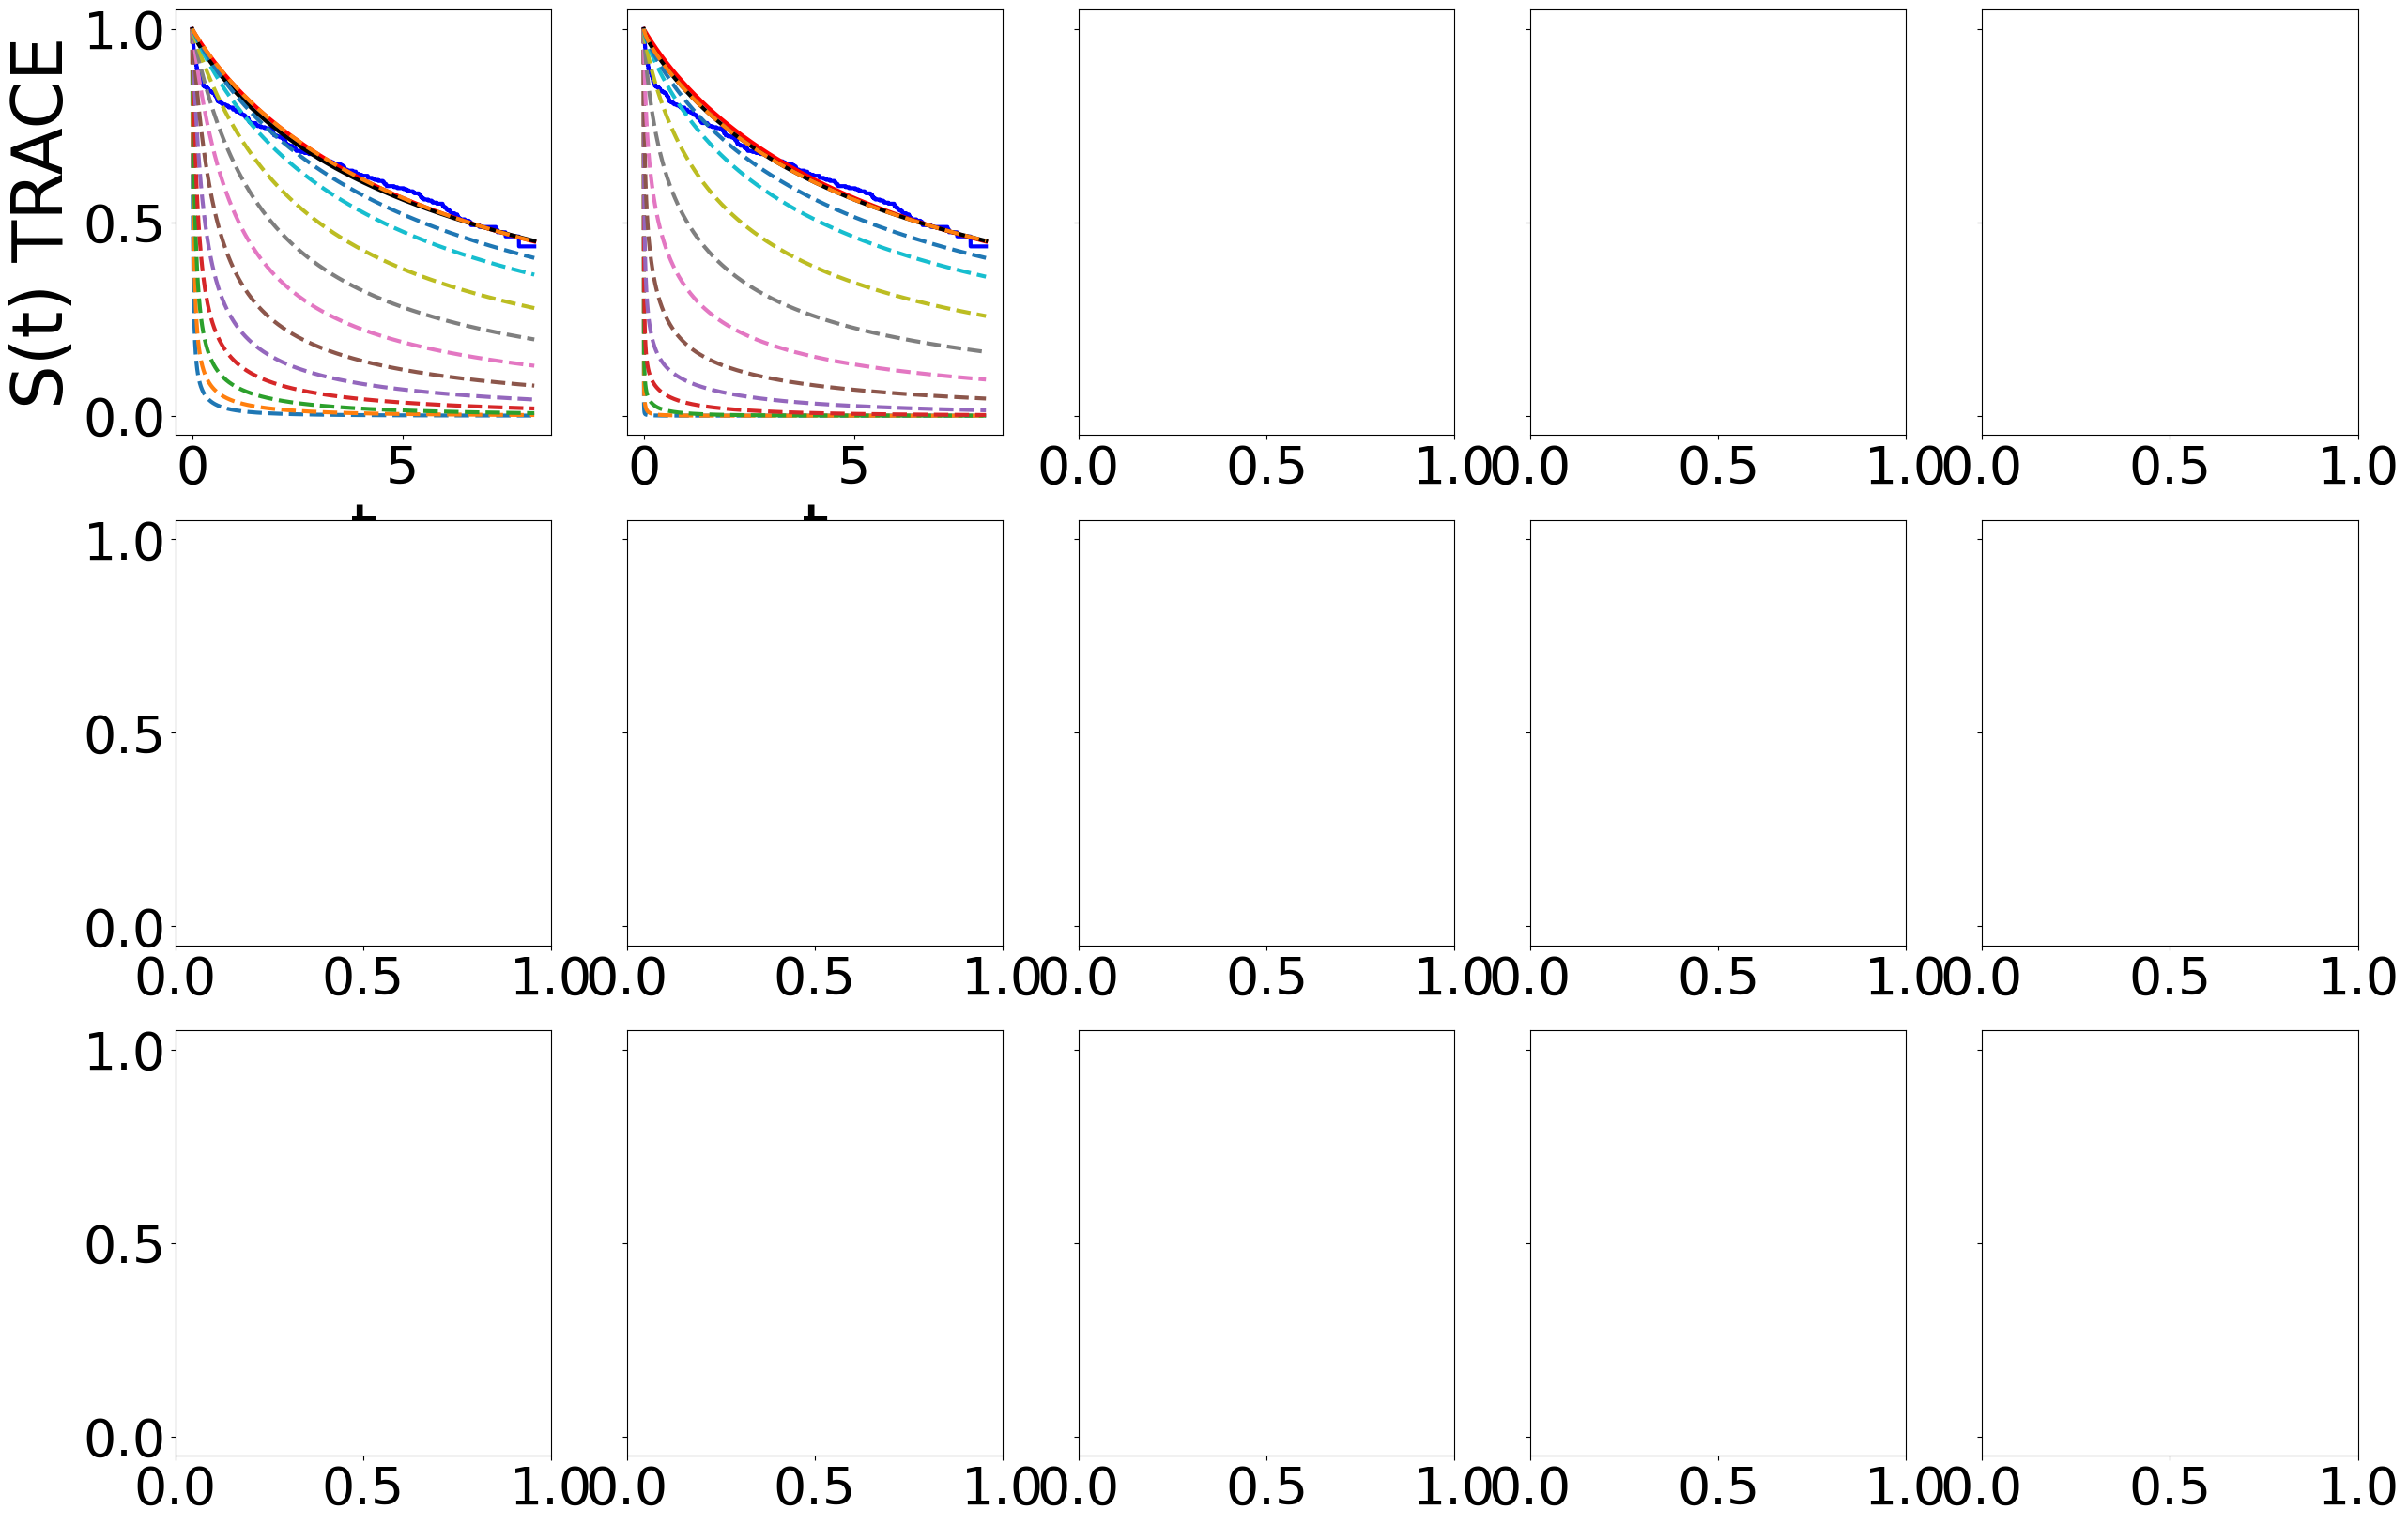

In [51]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"perturb_curves_subset.pdf")
file_subset = files[[-7,-2,-1],:]

fig,axes = plt.subplots(3,n_cols+1,figsize=(30,20),sharey=True)


SMALL_SIZE = 80
plt.rc('xtick', labelsize=SMALL_SIZE//2)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE//2)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)   # fontsize of the figure title

for i in range(3):
    for j in range(n_cols):
        print(i,j)
        fileij = file_subset[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        if dataset not in ["TRACE","stagec","zinc"]:
            continue
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        df_population= df_population.iloc[:,3:]

        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in robust_df.columns]
        baseline_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in baseline_df.columns]
        
        base1 = axes[i][j+1].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
        base2 = axes[i][j+1].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
        base3 = axes[i][j+1].plot(t,base_models.iloc[:,2],linewidth=3,c="k")

  
        robust1 = axes[i][j+1].plot(t,robust_df,'--',linewidth=3)
  
        if j == 0:
            base1 = axes[i][j].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
            base2 = axes[i][j].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
            base3 = axes[i][j].plot(t,base_models.iloc[:,2],linewidth=3,c="k")
            baseline1 = axes[i][j].plot(t,baseline_df,'--',linewidth=3)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=SMALL_SIZE//1.5)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

        axes[i][j+1].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=SMALL_SIZE//1.5)


fig.legend([base1, base2,base3,robust1], labels=labels, 
           loc="upper center",ncols=6,fontsize=30,bbox_to_anchor=(.5,1.11),prop={'size':SMALL_SIZE}) 

# axes[0][3].legend(base_models.columns.tolist() + robust_df.columns.tolist(),fontsize=20,ncol=2,loc=1)

# plt.legend(base_models.columns.tolist() + robust_df.columns.tolist(),loc='upper center',ncol=5)
plt.tight_layout(pad=0)
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

### DIST PLOTS

In [52]:
# CI , IBS , NegLL
results_folder = fr"results\{attack}"
img_name = "curve_distributions_test"

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{img_name}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

In [53]:
excels = np.sort(excels)
files = pd.DataFrame(excels.reshape(-1,len(algorithms)-1,order="F"),columns=["crownibp","fgsm","noise","pgd"]).reindex(["noise","fgsm","pgd","crownibp"],axis=1).values

In [54]:
save_folder = results_folder = os.path.join(r"results",attack,"dist_curves.pdf")

In [55]:
import seaborn as sns

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3
7 0
7 1
7 2
7 3
8 0
8 1
8 2
8 3
9 0
9 1
9 2
9 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_70660\550564763.py:62: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([mu,q95,q05], labels=labels,


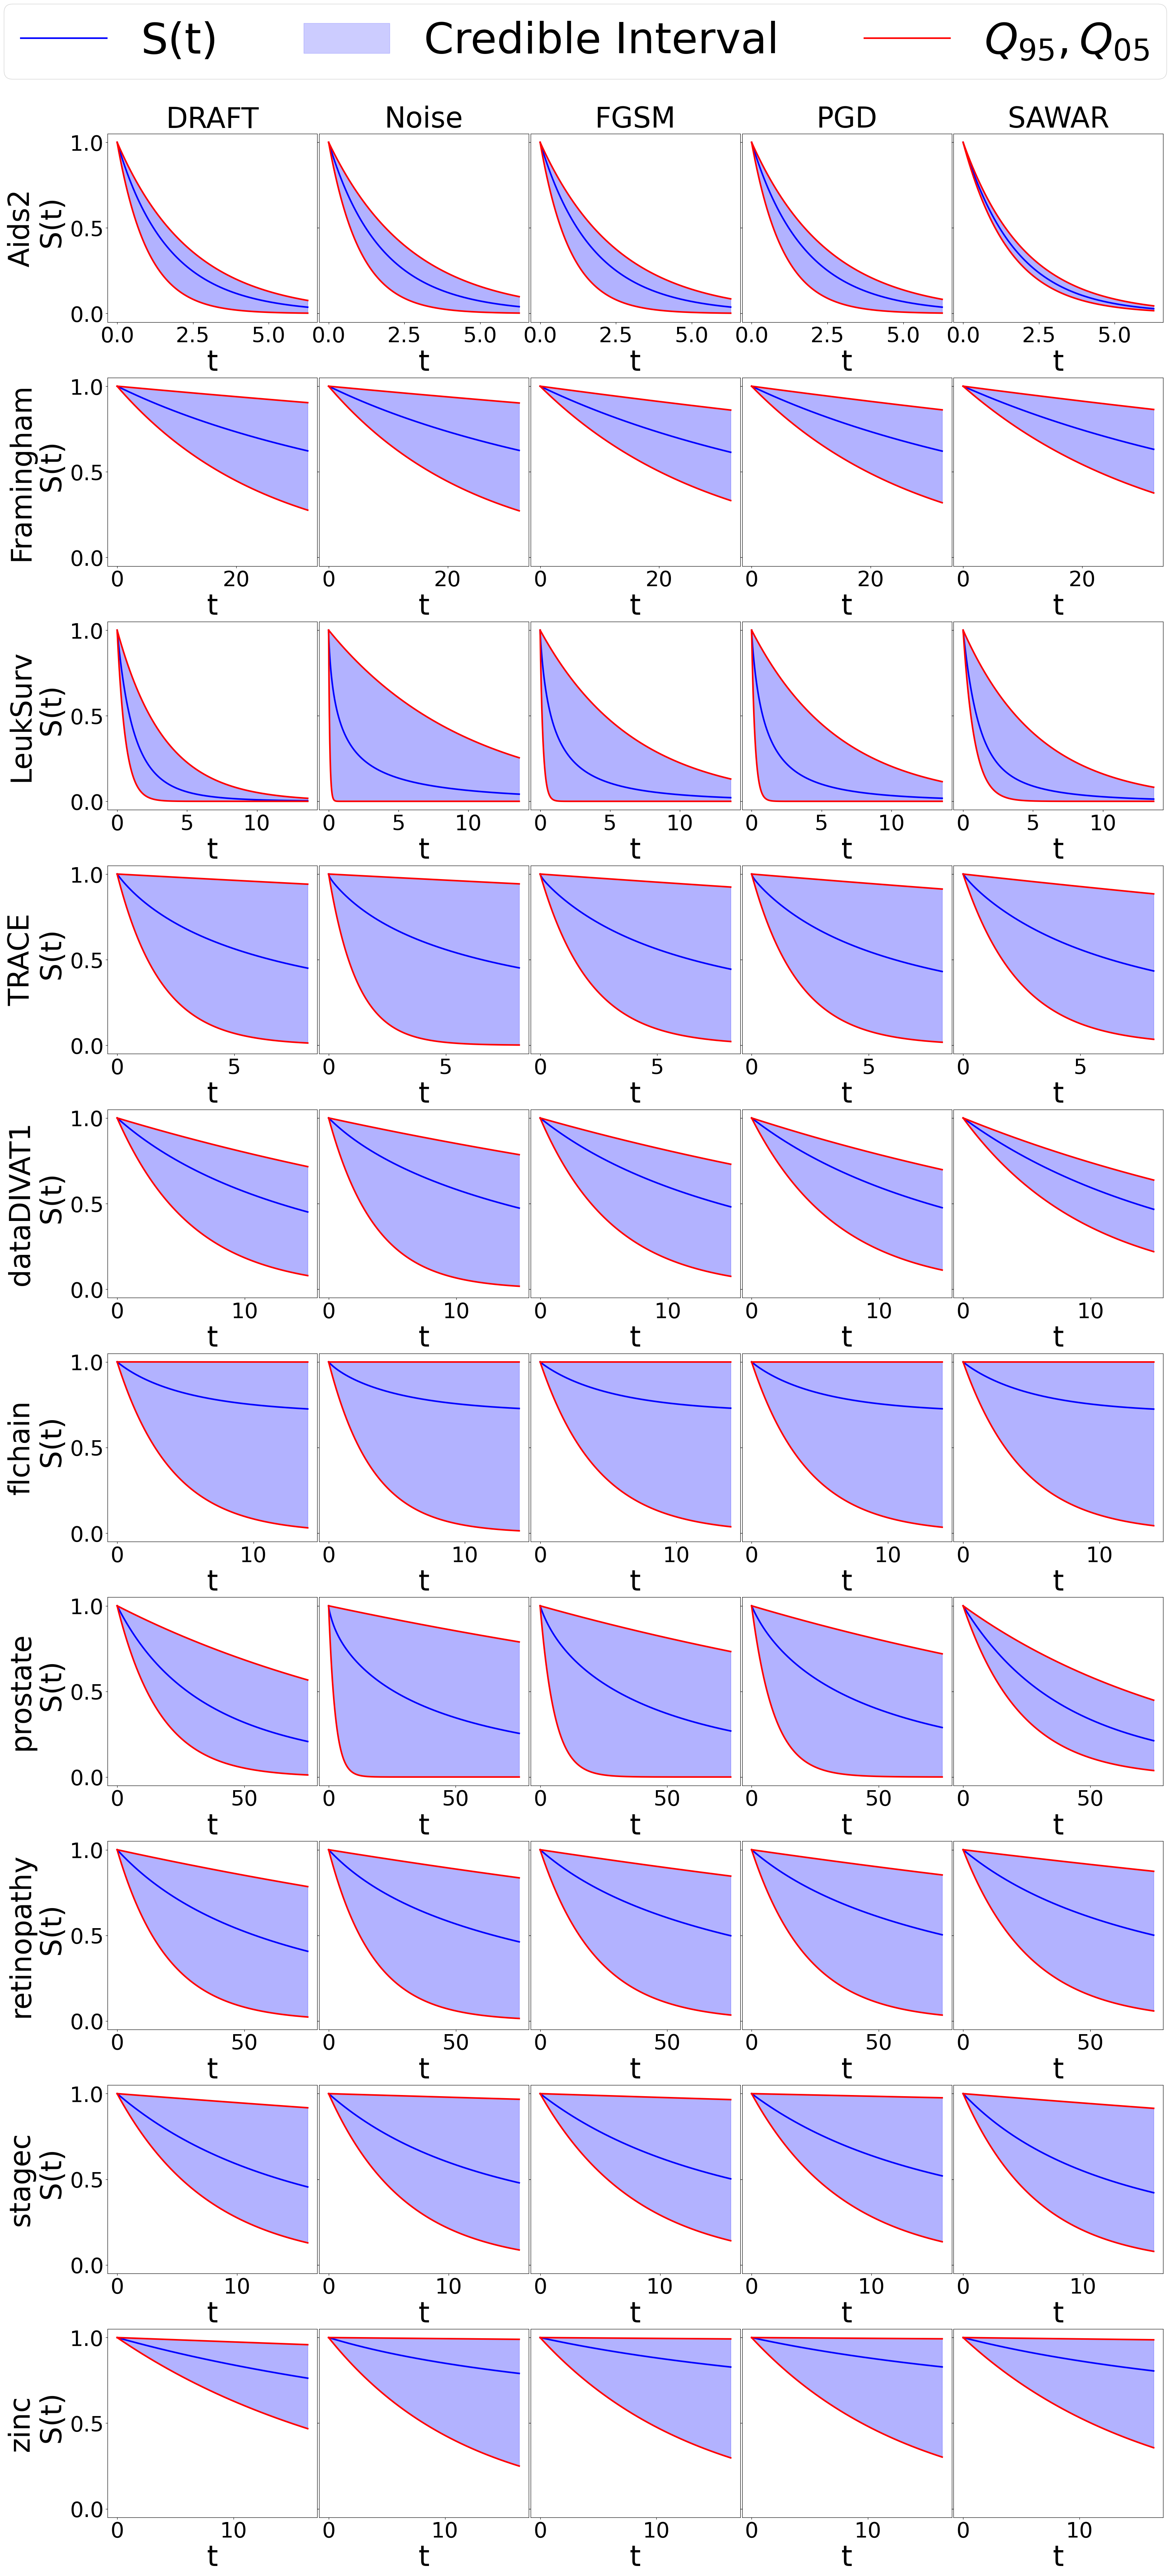

In [57]:
fig,axes = plt.subplots(n_rows,n_cols+1,figsize=(30,64),sharey=True)

SMALL_SIZE = 80
plt.rc('xtick', labelsize=SMALL_SIZE//2)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE//2)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)   # fontsize of the figure title


for i in range(n_rows):
    for j in range(n_cols):
        print(i,j)
        fileij = files[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = [col.split("_")[1] for col in robust_df.columns]
        baseline_df.columns =[col.split("_")[1] for col in baseline_df.columns]
        
        mu = sns.lineplot(x=t, y=robust_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j+1],c='b',legend=False)
        q95 = sns.lineplot(x=t, y=robust_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        q05 = sns.lineplot(x=t, y=robust_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)

        line = q05.get_lines()
        axes[i][j+1].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
        axes[i][j+1].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

        if j == 0:
            mu = sns.lineplot(x=t, y=baseline_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j],c='b',legend=False)
            q95 = sns.lineplot(x=t, y=baseline_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)
            q05 = sns.lineplot(x=t, y=baseline_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)

            axes[i][j].set_ylabel(f"{dataset}\n S(t)" ,fontsize=SMALL_SIZE//1.5)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)
            line = q05.get_lines()
            axes[i][j].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

for ax, col in zip(axes[0], algorithms):
    col = "SAWAR" if col == "crownibp" else col
    col = "DRAFT" if col == "baseline" else col
    col = "PGD" if col == "pgd" else col
    col = "FGSM" if col == "fgsm" else col
    col = "Noise" if col == "noise" else col
    ax.set_title(col,fontsize=SMALL_SIZE//1.5)

labels = ["S(t)","Credible Interval","$Q_{95},Q_{05}$"]
fig.legend([mu,q95,q05], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.05),prop={'size':SMALL_SIZE}) 

plt.tight_layout(pad=0)
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

In [ ]:
save_folder = results_folder = os.path.join(r"results",attack,"dist_curves_subset.pdf")
file_subset = files[[-7,-2,-1],:]

fig,axes = plt.subplots(3,n_cols+1,figsize=(30,20),sharey=True)

SMALL_SIZE = 20
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

for i in range(3):
    for j in range(n_cols):
        print(i,j)
        fileij = file_subset[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = [col.split("_")[1] for col in robust_df.columns]
        baseline_df.columns =[col.split("_")[1] for col in baseline_df.columns]
        
        mu = sns.lineplot(x=t, y=robust_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j+1],c='b',legend=False)
        q95 = sns.lineplot(x=t, y=robust_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        q05 = sns.lineplot(x=t, y=robust_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        axes[i][j+1].set_xlabel("t",fontsize=20)

        line = q05.get_lines()
        axes[i][j+1].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
        if j == 0:
            mu = sns.lineplot(x=t, y=baseline_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j],c='b',legend=False)
            q95 = sns.lineplot(x=t, y=baseline_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)
            q05 = sns.lineplot(x=t, y=baseline_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=30)
            axes[i][j].set_xlabel("t",fontsize=20)
            line = q05.get_lines()
            axes[i][j].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
            axes[i][j].set_xlabel("t",fontsize=20)

for ax, col in zip(axes[0], algorithms):
    col = "SAWAR" if col == "crownibp" else col
    col = "DRAFT" if col == "baseline" else col
    col = "PGD" if col == "pgd" else col
    col = "FGSM" if col == "fgsm" else col
    col = "Noise" if col == "noise" else col
    ax.set_title(col,fontsize=30)


labels = ["S(t)","Credible Interval","$Q_{95},Q_{05}$"]
fig.legend([mu,q95,q05], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.05)) 

plt.tight_layout()
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()